<a href="https://colab.research.google.com/github/pritam-banik-roy/eCommerce_Data_Analysis/blob/main/Pritam_Banik_Roy_Lookalike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Task 2: Lookalike Model**

### **Step 1: Load the Required Data**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Preview datasets
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

## **Step 2: Preprocess and Combine Data**

### **Merge datasets to create a unified view:**

In [ ]:
# Merge transactions with products
merged_data = pd.merge(transactions, products, on='ProductID')

# Merge with customers
merged_data = pd.merge(merged_data, customers, on='CustomerID')

# Preview the combined data
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins         Europe  202

### **Aggregate transaction data by customer:**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler



# Normalize numerical columns for scaling
scaler = MinMaxScaler() # Now MinMaxScaler is defined and can be used
numerical_cols = ['TotalValue', 'Quantity', 'UniqueProducts']
customer_profiles[numerical_cols] = scaler.fit_transform(customer_profiles[numerical_cols])



In [ ]:
# Aggregate data to create customer profiles
customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total revenue per customer
    'Quantity': 'sum',    # Total quantity purchased
    'ProductID': 'nunique',  # Unique products purchased
    'Category': lambda x: x.mode()[0],  # Most common category
    'Region': 'first'     # Customer's region
}).reset_index()

# Rename columns for clarity
customer_profiles.rename(columns={'ProductID': 'UniqueProducts'}, inplace=True)

# Convert categorical columns to numerical for similarity computation
customer_profiles = pd.get_dummies(customer_profiles, columns=['Category', 'Region'])

# Normalize numerical columns for scaling
scaler = MinMaxScaler()
numerical_cols = ['TotalValue', 'Quantity', 'UniqueProducts']
customer_profiles[numerical_cols] = scaler.fit_transform(customer_profiles[numerical_cols])

# Preview processed customer profiles
print(customer_profiles.head())


  CustomerID  TotalValue  Quantity  UniqueProducts  Category_Books  \
0      C0001    0.308942  0.354839        0.444444           False   
1      C0002    0.168095  0.290323        0.333333           False   
2      C0003    0.249541  0.419355        0.333333           False   
3      C0004    0.497806  0.709677        0.777778            True   
4      C0005    0.184287  0.193548        0.222222           False   

   Category_Clothing  Category_Electronics  Category_Home Decor  Region_Asia  \
0              False                  True                False        False   
1               True                 False                False         True   
2              False                 False                 True        False   
3              False                 False                False        False   
4              False                  True                False         True   

   Region_Europe  Region_North America  Region_South America  
0          False                 Fa

# **Step 3: Compute Similarity Scores**

### **Calculate cosine similarity:**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity # Import cosine_similarity



# Extract numerical features for similarity computation
features = customer_profiles.drop(['CustomerID'], axis=1).values

# Compute similarity matrix
similarity_matrix = cosine_similarity(features)

# Convert similarity matrix to a DataFrame for easier interpretation
similarity_df = pd.DataFrame(similarity_matrix, index=customer_profiles['CustomerID'], columns=customer_profiles['CustomerID'])

# Preview similarity scores
print(similarity_df.head())

CustomerID     C0001     C0002     C0003     C0004     C0005     C0006  \
CustomerID                                                               
C0001       1.000000  0.130690  0.576407  0.614632  0.540577  0.580150   
C0002       0.130690  1.000000  0.120234  0.200947  0.534736  0.121417   
C0003       0.576407  0.120234  1.000000  0.598674  0.090151  0.572907   
C0004       0.614632  0.200947  0.598674  1.000000  0.150650  0.955345   
C0005       0.540577  0.534736  0.090151  0.150650  1.000000  0.095438   

CustomerID     C0007     C0008     C0009     C0010  ...     C0191     C0192  \
CustomerID                                          ...                       
C0001       0.548131  0.268262  0.065148  0.137588  ...  0.582576  0.991688   
C0002       0.538588  0.206157  0.516699  0.553069  ...  0.125291  0.094213   
C0003       0.101135  0.586361  0.054697  0.129496  ...  0.572140  0.551349   
C0004       0.167459  0.409407  0.097709  0.213431  ...  0.959949  0.557138   
C0005  

In [ ]:
# Extract numerical features for similarity computation
features = customer_profiles.drop(['CustomerID'], axis=1).values

# Compute similarity matrix
similarity_matrix = cosine_similarity(features)

# Convert similarity matrix to a DataFrame for easier interpretation
similarity_df = pd.DataFrame(similarity_matrix, index=customer_profiles['CustomerID'], columns=customer_profiles['CustomerID'])

# Preview similarity scores
print(similarity_df.head())


CustomerID     C0001     C0002     C0003     C0004     C0005     C0006  \
CustomerID                                                               
C0001       1.000000  0.130690  0.576407  0.614632  0.540577  0.580150   
C0002       0.130690  1.000000  0.120234  0.200947  0.534736  0.121417   
C0003       0.576407  0.120234  1.000000  0.598674  0.090151  0.572907   
C0004       0.614632  0.200947  0.598674  1.000000  0.150650  0.955345   
C0005       0.540577  0.534736  0.090151  0.150650  1.000000  0.095438   

CustomerID     C0007     C0008     C0009     C0010  ...     C0191     C0192  \
CustomerID                                          ...                       
C0001       0.548131  0.268262  0.065148  0.137588  ...  0.582576  0.991688   
C0002       0.538588  0.206157  0.516699  0.553069  ...  0.125291  0.094213   
C0003       0.101135  0.586361  0.054697  0.129496  ...  0.572140  0.551349   
C0004       0.167459  0.409407  0.097709  0.213431  ...  0.959949  0.557138   
C0005  

# **Step 4: Find Top 3 Lookalikes**

### **Identify top 3 similar customers for each target customer:**

In [ ]:
# Define a function to get top 3 similar customers
def get_top_lookalikes(similarity_df, customer_id, top_n=3):
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).iloc[1:top_n+1]
    return [(cust_id, round(score, 4)) for cust_id, score in similar_customers.items()]

# Create a dictionary to store lookalikes for the first 20 customers
lookalikes = {}
for customer_id in customer_profiles['CustomerID'][:20]:
    lookalikes[customer_id] = get_top_lookalikes(similarity_df, customer_id)

# Preview lookalikes
print(lookalikes)


{'C0001': [('C0048', 0.9996), ('C0190', 0.9989), ('C0184', 0.9975)], 'C0002': [('C0088', 0.9974), ('C0092', 0.9945), ('C0106', 0.994)], 'C0003': [('C0031', 0.9957), ('C0076', 0.9951), ('C0052', 0.9941)], 'C0004': [('C0087', 0.9959), ('C0155', 0.9941), ('C0169', 0.9927)], 'C0005': [('C0186', 0.9998), ('C0007', 0.9992), ('C0115', 0.9973)], 'C0006': [('C0168', 0.9988), ('C0187', 0.9972), ('C0011', 0.9969)], 'C0007': [('C0115', 0.9994), ('C0005', 0.9992), ('C0186', 0.9984)], 'C0008': [('C0065', 0.984), ('C0059', 0.9828), ('C0160', 0.9553)], 'C0009': [('C0198', 0.997), ('C0061', 0.9945), ('C0062', 0.9896)], 'C0010': [('C0111', 0.9947), ('C0103', 0.9905), ('C0061', 0.9888)], 'C0011': [('C0137', 0.999), ('C0174', 0.9986), ('C0191', 0.9983)], 'C0012': [('C0195', 0.9974), ('C0163', 0.9974), ('C0113', 0.9968)], 'C0013': [('C0108', 0.9977), ('C0099', 0.9975), ('C0107', 0.9813)], 'C0014': [('C0060', 0.9999), ('C0089', 0.9801), ('C0166', 0.9469)], 'C0015': [('C0131', 0.9937), ('C0036', 0.9922), ('C

# **Step 5: Save Results to CSV**

**# Save the lookalikes to the required format:**

In [ ]:
# Convert lookalikes dictionary to a DataFrame
lookalike_list = []
for cust_id, similar in lookalikes.items():
    lookalike_list.append({'cust_id': cust_id, 'lookalikes': similar})

lookalike_df = pd.DataFrame(lookalike_list)

# Save to CSV
lookalike_df.to_csv('Lookalike.csv', index=False)

print("Lookalike.csv created successfully.")


Lookalike.csv created successfully.


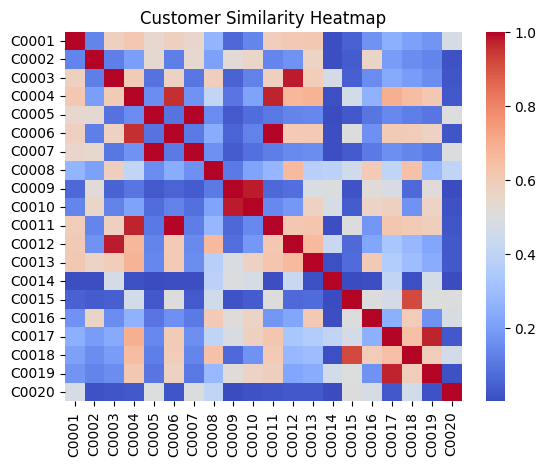

In [ ]:
# Plot heatmap of similarity scores
sns.heatmap(similarity_matrix[:20, :20], xticklabels=customer_profiles['CustomerID'][:20], yticklabels=customer_profiles['CustomerID'][:20], cmap='coolwarm')
plt.title('Customer Similarity Heatmap')
plt.show()
